<a href="https://colab.research.google.com/github/alialthiab/Data-Science/blob/Machine-Learning/Heart_Disease_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
heart_df=pd.read_csv("/content/heart.csv")

# Data Exploration

In [6]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [9]:
s = (heart_df.dtypes==object)
object_cols = list(s[s].index)
object_cols

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [10]:
heart_df.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [11]:
heart_df.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [12]:
heart_df.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

In [13]:
heart_df.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

# Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8af154efd0>,
      dtype=object)

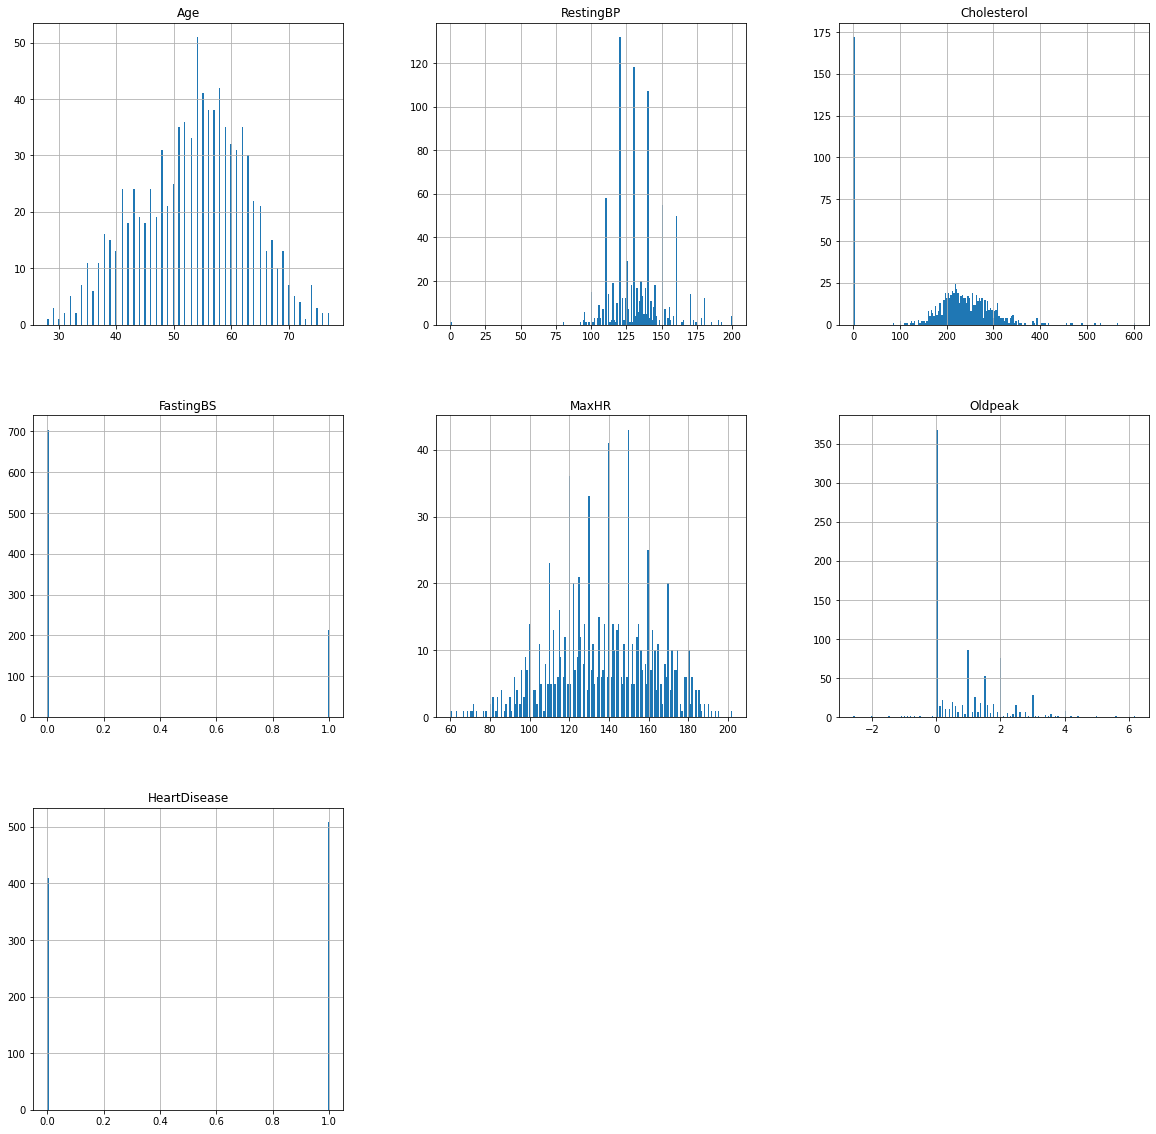

In [14]:
heart_df.hist(figsize = (20,20),bins=200)

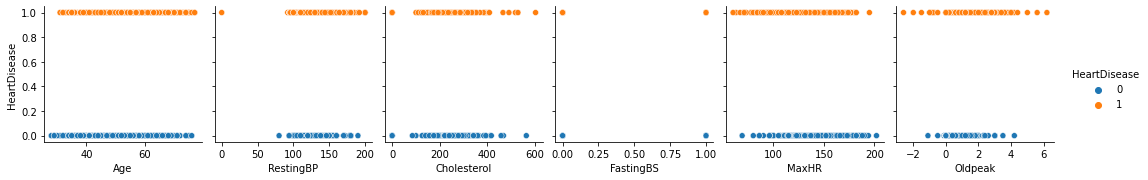

In [15]:
cols = heart_df.columns
sns.pairplot(
    heart_df,
    x_vars = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS'
       , 'MaxHR', 'Oldpeak', ],
    y_vars = ["HeartDisease"],
    hue="HeartDisease"
             )

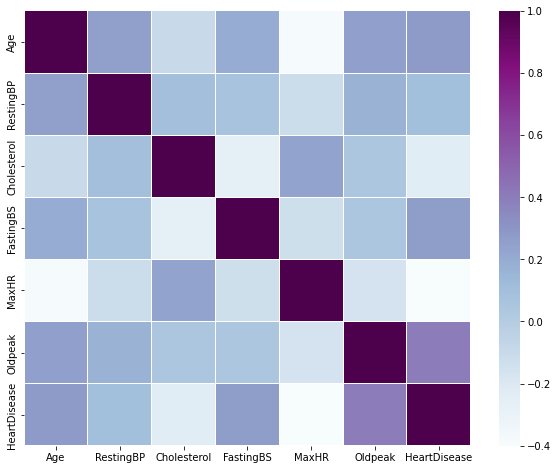

In [16]:
heart_df_Corr=heart_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(heart_df_Corr,cmap="BuPu",linewidths=0.005)


In [17]:
heart_df_Corr['HeartDisease'].sort_values()

MaxHR          -0.400421
Cholesterol    -0.232741
RestingBP       0.107589
FastingBS       0.267291
Age             0.282039
Oldpeak         0.403951
HeartDisease    1.000000
Name: HeartDisease, dtype: float64

# Data Preparation

## Categorical Data

In [18]:
heart_df1 = heart_df.copy()

In [19]:
heart_df1.Sex.unique()

array(['M', 'F'], dtype=object)

In [20]:
object_cols

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [21]:
heart_df1.ChestPainType.replace({'ATA':2, 'NAP':3, 'ASY':0, 'TA':1}, inplace=True)
heart_df1.Sex.replace({'F':0, 'M':1}, inplace=True)
heart_df1.ExerciseAngina.replace({'N':0, 'Y':1}, inplace=True)
heart_df1.RestingECG.replace({'Normal':0, 'ST':1, 'LVH':2}, inplace=True)
heart_df1.ST_Slope.replace({'Flat':0, 'Up':1, 'Down':-1}, inplace=True)

In [22]:
heart_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [23]:
heart_df_Corr=heart_df1.corr()
heart_df_Corr['HeartDisease'].sort_values()

ST_Slope         -0.558771
ChestPainType    -0.466847
MaxHR            -0.400421
Cholesterol      -0.232741
RestingECG        0.061011
RestingBP         0.107589
FastingBS         0.267291
Age               0.282039
Sex               0.305445
Oldpeak           0.403951
ExerciseAngina    0.494282
HeartDisease      1.000000
Name: HeartDisease, dtype: float64

## Outliers

In [24]:
from scipy import stats
import numpy as np
heart_df2=heart_df1[(np.abs(stats.zscore(heart_df1))<3).all(axis=1)]
heart_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             899 non-null    int64  
 1   Sex             899 non-null    int64  
 2   ChestPainType   899 non-null    int64  
 3   RestingBP       899 non-null    int64  
 4   Cholesterol     899 non-null    int64  
 5   FastingBS       899 non-null    int64  
 6   RestingECG      899 non-null    int64  
 7   MaxHR           899 non-null    int64  
 8   ExerciseAngina  899 non-null    int64  
 9   Oldpeak         899 non-null    float64
 10  ST_Slope        899 non-null    int64  
 11  HeartDisease    899 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 91.3 KB


In [25]:
heart_df2.head(20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,0,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,0,138,214,0,0,108,1,1.5,0,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0
8,37,1,0,140,207,0,0,130,1,1.5,0,1
9,48,0,2,120,284,0,0,120,0,0.0,1,0


## Features Scaling

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaledData = MinMaxScaler()

heart_df3 = pd.DataFrame(scaledData.fit_transform(heart_df2),columns=heart_df2.columns,index=heart_df2.index)
heart_df3.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000
mean,0.520351,0.789766,0.365962,0.495503,0.382250,0.232481,0.299221,0.531782,0.403782,0.476919,0.686874,0.547275
std,0.192981,0.407701,0.422895,0.163056,0.206868,0.422649,0.401846,0.182423,0.490928,0.167938,0.300529,0.498037
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.387755,1.000000,0.000000,0.380952,0.336873,0.000000,0.000000,0.410072,0.000000,0.333333,0.500000,0.000000
50%,0.530612,1.000000,0.000000,0.476190,0.428571,0.000000,0.000000,0.539568,0.000000,0.416667,0.500000,1.000000
75%,0.653061,1.000000,0.666667,0.571429,0.513514,0.000000,0.500000,0.669065,1.000000,0.583333,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model Selection and Training

In [27]:
from sklearn.model_selection import train_test_split
train_set,test_set= train_test_split(heart_df3,test_size=0.1)

## Data split

In [28]:
train_set_y = train_set.HeartDisease.copy()
train_set_x = train_set.drop(columns=['HeartDisease'], axis=1,).copy()

test_set_y = train_set.HeartDisease.copy()
test_set_x = train_set.drop(columns=['HeartDisease'], axis=1,).copy()

In [29]:
train_set_x.info()
test_set_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 809 entries, 694 to 208
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             809 non-null    float64
 1   Sex             809 non-null    float64
 2   ChestPainType   809 non-null    float64
 3   RestingBP       809 non-null    float64
 4   Cholesterol     809 non-null    float64
 5   FastingBS       809 non-null    float64
 6   RestingECG      809 non-null    float64
 7   MaxHR           809 non-null    float64
 8   ExerciseAngina  809 non-null    float64
 9   Oldpeak         809 non-null    float64
 10  ST_Slope        809 non-null    float64
dtypes: float64(11)
memory usage: 75.8 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 809 entries, 694 to 208
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             809 non-null    float64
 1   Sex             809

## Training Models

### Logistic Regression

Training

In [33]:
from sklearn.linear_model import LogisticRegression

LogisticRegressionModel = LogisticRegression()

LogisticRegressionModel.fit(train_set_x, train_set_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Prediction

In [34]:
test_set_x_prediction = LogisticRegressionModel.predict(test_set_x)
test_set_x_prediction.shape

(809,)

Validation

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

LogisticRegressionMAE = mean_absolute_error(test_set_y, test_set_x_prediction)
print("MAE:", str(LogisticRegressionMAE))

LogisticRegressionMSE = np.sqrt(mean_squared_error(train_set_y, test_set_x_prediction))
print("MSE:", str(LogisticRegressionMSE))


MAE: 0.1334981458590853
MSE: 0.36537398081840106


### Decision Tree

Training

In [36]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifierModel = DecisionTreeClassifier()
DecisionTreeClassifierModel.fit(train_set_x, train_set_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Prediction

In [37]:
test_set_x_prediction = DecisionTreeClassifierModel.predict(test_set_x)
test_set_x_prediction

array([0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0.

Validation

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

DecisionTreeClassifierMAE = mean_absolute_error(test_set_y, test_set_x_prediction)
print("MAE:", str(DecisionTreeClassifierMAE))

DecisionTreeClassifiernMSE = np.sqrt(mean_squared_error(train_set_y, test_set_x_prediction))
print("MSE:", str(DecisionTreeClassifiernMSE))

MAE: 0.0
MSE: 0.0


### Random Forest

Training

In [39]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifierModel = RandomForestClassifier()
RandomForestClassifierModel.fit(train_set_x, train_set_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Prediction

In [40]:
test_set_x_prediction = RandomForestClassifierModel.predict(test_set_x)

Validation

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

RandomForestClassifierMAE = mean_absolute_error(test_set_y, test_set_x_prediction)
print("MAE:", str(RandomForestClassifierMAE))

RandomForestClassifierMSE = np.sqrt(mean_squared_error(train_set_y, test_set_x_prediction))
print("MSE:", str(RandomForestClassifierMSE))

MAE: 0.0
MSE: 0.0


### XGBoost

Training

In [42]:
from xgboost import XGBClassifier

XGBClassifierModel = XGBClassifier()

XGBClassifierModel.fit(train_set_x, train_set_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Prediction

In [43]:
test_set_x_prediction = XGBClassifierModel.predict(test_set_x)


Validation

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

XGBClassifierMAE = mean_absolute_error(test_set_y, test_set_x_prediction)
print("MAE:", str(XGBClassifierMAE))

XGBClassifierMSE = np.sqrt(mean_squared_error(train_set_y, test_set_x_prediction))
print("MSE:", str(XGBClassifierMSE))

MAE: 0.06674907292954264
MSE: 0.2583584195058149


### SGDClassifier

Training

In [46]:
from sklearn.linear_model import SGDClassifier
SGDClassifierModel = SGDClassifier()
SGDClassifierModel.fit(train_set_x, train_set_y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

Prediction

In [47]:
test_set_x_prediction = SGDClassifierModel.predict(test_set_x)

Validation

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

SGDClassifierMAE = mean_absolute_error(test_set_y, test_set_x_prediction)
print("MAE:", str(SGDClassifierMAE))

SGDClassifierMSE = np.sqrt(mean_squared_error(train_set_y, test_set_x_prediction))
print("MSE:", str(SGDClassifierMAE))

MAE: 0.15945611866501855
MSE: 0.15945611866501855


## Performance Measure

we've noticed the best model was Random Forest withe the deffault hyper paramaters, so we'll discuss the performance measure based on.

###  Measuring Accuracy Using Cross-validation

In [65]:
from sklearn.model_selection import cross_val_score, cross_val_predict
cross_val_score(RandomForestClassifierModel, train_set_x, train_set_y, cv=5, scoring="accuracy")

array([0.92592593, 0.89506173, 0.85802469, 0.87654321, 0.88819876])

In [60]:
cross_val_score(LogisticRegressionModel, train_set_x, train_set_y, cv=5, scoring="accuracy")

array([0.88271605, 0.85185185, 0.85802469, 0.85185185, 0.85714286])

In [61]:
cross_val_score(DecisionTreeClassifierModel, train_set_x, train_set_y, cv=5, scoring="accuracy")

array([0.83950617, 0.80864198, 0.80246914, 0.81481481, 0.77018634])

In [67]:
cross_val_score(XGBClassifierModel, train_set_x, train_set_y, cv=5, scoring="accuracy")

array([0.91358025, 0.88888889, 0.83950617, 0.89506173, 0.86335404])

In [63]:
cross_val_score(SGDClassifierModel, train_set_x, train_set_y, cv=5, scoring="accuracy")

array([0.86419753, 0.83950617, 0.81481481, 0.85185185, 0.86335404])

*we'll neglect DT model, SGDC model, and LR model.*

###Confusion matrix

In [87]:
from sklearn.metrics import confusion_matrix,f1_score, roc_curve, precision_score, recall_score

In [74]:
prediction1 = cross_val_predict(RandomForestClassifierModel, train_set_x, train_set_y, cv=5)
confusion_matrix(train_set_y, prediction1)

array([[318,  53],
       [ 41, 397]])

In [76]:
prediction2 = cross_val_predict(XGBClassifierModel, train_set_x, train_set_y, cv=5)
confusion_matrix(train_set_y, prediction2)

array([[319,  52],
       [ 45, 393]])

#### Precision & Recall

for RF:

In [82]:
precision_score(train_set_y, prediction1)

0.8822222222222222

In [83]:
recall_score(train_set_y, prediction1)

0.906392694063927

In [85]:
f1_score(train_set_y, prediction1)

0.8941441441441442

for XGBC:

In [79]:
precision_score(train_set_y, prediction2)

0.8831460674157303

In [81]:
recall_score(train_set_y, prediction2)

0.8972602739726028

In [86]:
f1_score(train_set_y, prediction2)

0.8901472253680635